In [138]:

import sys
import os
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

import torchvision.utils as vutils

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

from models import Generator, Discriminator, FeatureExtractor


imageSize = 32
upSampling = 2

transform = transforms.Compose([#transforms.RandomCrop(imageSize*upSampling),
                                #transforms.FiveCrop(15),
                                transforms.Scale(imageSize*upSampling),
                                transforms.ToTensor()])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

scale = transforms.Compose([transforms.ToPILImage(),
                            transforms.Resize(imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                std = [0.229, 0.224, 0.225])
                            ])

# Equivalent to un-normalizing ImageNet (for correct visualization)
unnormalize = transforms.Normalize(mean = [-2.118, -2.036, -1.804], std = [4.367, 4.464, 4.444])
unscale = transforms.Compose([
                            transforms.ToPILImage()
                            
                            ])

feature_extractor = FeatureExtractor(torchvision.models.vgg19(pretrained=True))
generator = Generator(16, upSampling)
generator.load_state_dict(torch.load('checkpoints/generator_final.pth'))



def convert_img(img_tensor, nrow):

#     img_tensor = unnormalize(img_tensor)
    im = unscale(img_tensor)

    return im

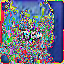

In [136]:
# img = Image.open("../DCgan/DCGANresults/fake_samples_epoch_079.png")
# img = Image.open("../SN-GAN/log/fake_samples_epoch_005.png")
img = Image.open("../anime-faces/1boy/danbooru_2624725_6e6d1ec9b4b04a7af2ecfa782a6d9ff9.png")
# im_all = np.empty([8,8,3,64,64])
low_in = img.resize((32,32))
i = 5
j = 3
#         wait = input("PRESS ENTER TO CONTINUE.")
# low_in = img.crop((34*i+2, 34*j+2,34*(i+1), 34*(j+1)))
low_res = Variable(scale(transform(low_in))).unsqueeze(0)
# low_res = Variable(transform(low_in)).unsqueeze(0)
high_res_fake = generator(Variable(low_res)).squeeze()
im = convert_img(high_res_fake.data, 1)
# im = vutils.make_grid(high_res_fake.cpu().data, 1)
                    
im

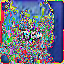

In [142]:
img = Image.open("../anime-faces/1boy/danbooru_2624725_6e6d1ec9b4b04a7af2ecfa782a6d9ff9.png")
# im_all = np.empty([8,8,3,64,64])
low_in =  scale(transform(img))
i = 5
j = 3
# wait = input("PRESS ENTER TO CONTINUE.")
# low_in = img.crop((34*i+2, 34*j+2,34*(i+1), 34*(j+1)))
# low_res = Variable(transform(low_in)).unsqueeze(0)
high_res_fake = generator(Variable(low_res)).squeeze()
im = convert_img(high_res_fake.data, 1)
# im = vutils.make_grid(high_res_fake.cpu().data, 1)
                    
im

In [ ]:
# img = Image.open("../DCgan/DCGANresults/fake_samples_epoch_079.png")
# img = Image.open("../SN-GAN/log/fake_samples_epoch_005.png")
img = Image.open("../anime-faces/1boy/danbooru_2624725_6e6d1ec9b4b04a7af2ecfa782a6d9ff9.png")
# im_all = np.empty([8,8,3,64,64])
low_in = img.resize((32,32))
i = 5
j = 3
#         wait = input("PRESS ENTER TO CONTINUE.")
# low_in = img.crop((34*i+2, 34*j+2,34*(i+1), 34*(j+1)))
low_res = Variable(scale(transform(low_in))).unsqueeze(0)
high_res_fake = generator(Variable(low_res)).squeeze()
# im = convert_img(high_res_fake.data, 1)
vutils.save_image(high_res_fake.cpu().data,
                    '%s/fake_samples_epoch_%03d.jpg' % (opt.out, epoch))


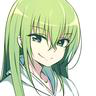

In [119]:
low_in